<a href="https://colab.research.google.com/github/boramkim0514/KOIPA_AI/blob/main/D32_3_%EA%B5%AC%EA%B0%84%EB%B6%84%ED%95%A0_%EC%9D%B4%EC%82%B0%ED%99%94%2C_%EC%83%81%ED%98%B8%EC%9E%91%EC%9A%A9_%EB%8B%A4%ED%95%AD%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 원본 특성의 다항식 추가

* 구간 분할은 연속형 특성을 확장하는 하나의 방법.
* 원본 특성($x$)의 다항식을 추가하는 방법
  * 어떠한 특성 $x$에 대해 $x^2$, $x^3$, $x^4$, $\cdots$ 등등을 새롭게 추가하는 방식
* 사이킷 런의 `preprocessing` 모듈의 `PolynomialFeatures`에 구

In [9]:
!pip install mglearn

     |████████████████████████████████| 542kB 14.6MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=f8825008ae12fe9e7a13f39d72f32d84393f96c132ac318782194bae133fd77e
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [13]:
import matplotlib.pyplot as plt
import mglearn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [21]:
from sklearn.preprocessing import PolynomialFeatures
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)


# x의 10제곱 까지의 고차항을 추가
# include_bias가 True면 편향을 1로 추가한다. - 값이 1인 특성이 하나가 추가가 된다.
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)

X_poly = poly.transform(X)

* 10차원 ( `degree=10` )으로 변환 했기 때문에 9개의 특성이 새롭게 추가 된다. (즉 원본 1개 + 새로운거 9개 = 10개)

* `include_bias=True`로 했으면 편향이 하나 더 붙으니까 11개


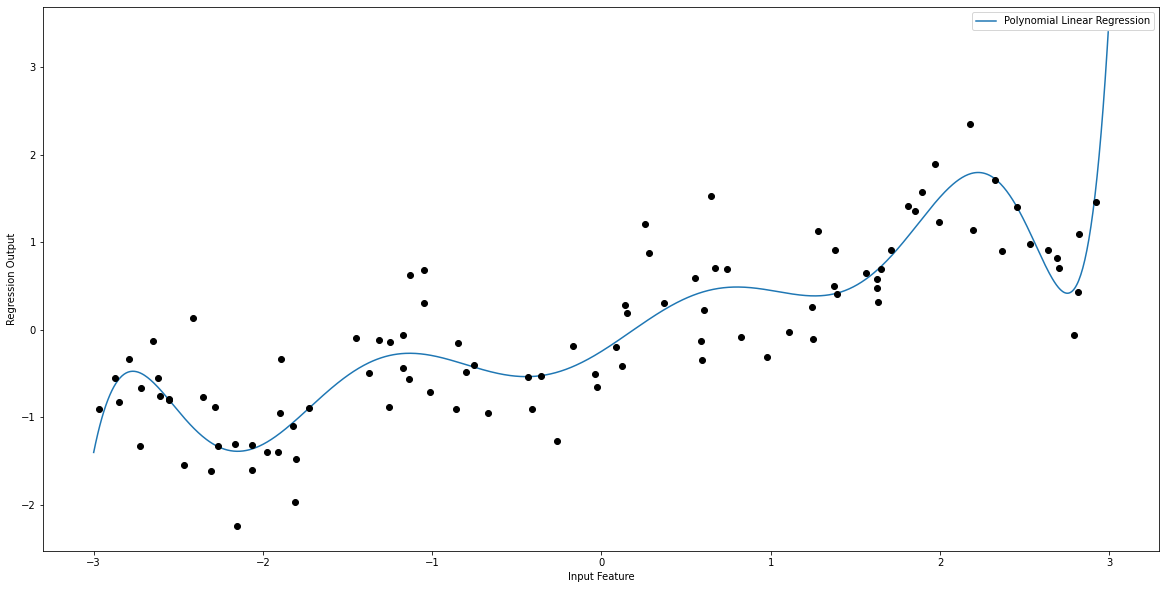

In [25]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.rcParams['figure.figsize']=(20, 10)
plt.plot(line, reg.predict(line_poly), label="Polynomial Linear Regression")
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.legend(loc='best')
plt.show()

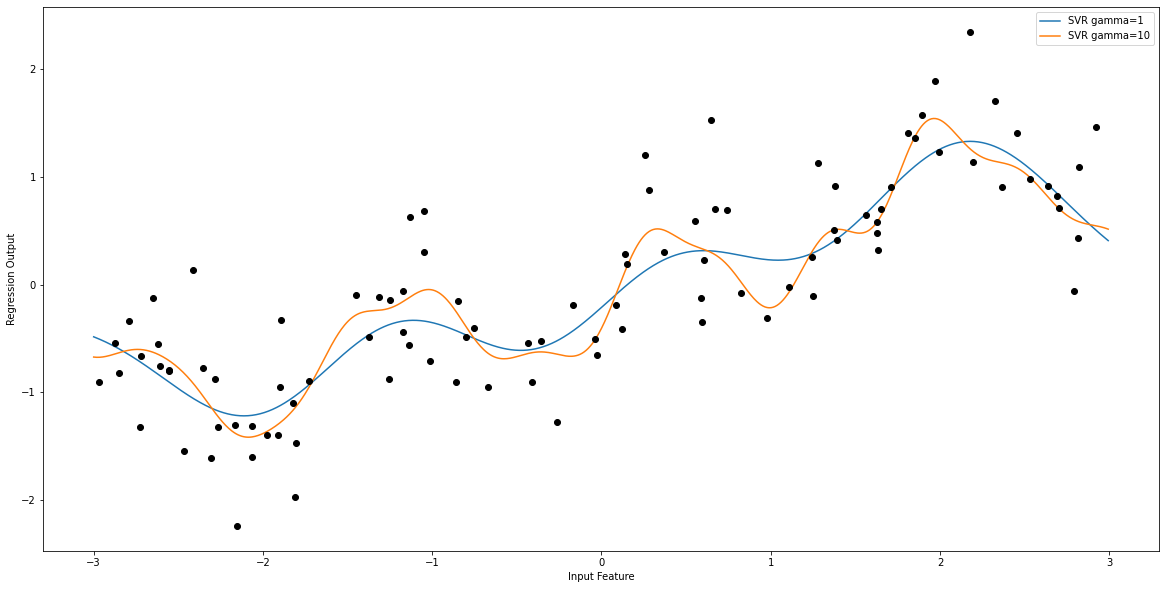

In [24]:
from sklearn.svm import SVR
plt.rcParams['figure.figsize']=(20, 10)
for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.legend(loc='best')
plt.show()

#보스턴 주택 가격 데이터셋 이용한 다항식 추가 테스트

In [36]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()

X_train, X_test, y_train, y_test = train_test_split(
    boston['data'],
    boston['target'],
    random_state=0
)
# data scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 차수를 2로 다항식 추가    
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)

X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print("원본 X_train의 형상 : {}".format(X_train.shape))
print("다항식 X_train_poly의 형상 : {}".format(X_train_poly.shape))

원본 X_train의 형상 : (379, 13)
다항식 X_train_poly의 형상 : (379, 105)


In [37]:
print("다항 특성의 이름 : \n{}".format(poly.get_feature_names()))

다항 특성의 이름 : 
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


# 선형 모델로 테스트 하기

In [38]:
#다항식 추가하지 않은 경우
from sklearn.linear_model import Ridge

In [41]:
ridge = Ridge().fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때의 점수 : {:.3f}".format(ridge.score(X_test_scaled, y_test)))

ridge = Ridge().fit(X_train_poly, y_train) # 상호작용이 있을때 점수가 높아짐을 볼 수 있다(비효율적 특성이 생겨서 메모리 비용이 늘어난다는 담점이 있지만..)
print("상호작용 특성이 있을 때의 점수 : {:.3f}".format(ridge.score(X_test_poly, y_test)))

상호작용 특성이 없을 때의 점수 : 0.621
상호작용 특성이 있을 때의 점수 : 0.753


In [43]:
PolynomialFeatures?

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = 